In [5]:
## thư viện của python
import pandas as pd
import os ##Operating System
import matplotlib.pyplot as plt
#filename = input('Please key in the filename: ')
#df = pd.read_csv(filename)
#df

In [6]:
path ='data/'
dataframe = pd.read_csv(path + 'sales2019_1.csv')
dataframe.head(10) ##in ra 10 hàng dữ liệu ( 0 - 9 )

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
5,141239,AAA Batteries (4-pack),1,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016"
6,141240,27in 4K Gaming Monitor,1,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001"
7,141241,USB-C Charging Cable,1,11.95,01/05/19 12:04,"181 6th St, San Francisco, CA 94016"
8,141242,Bose SoundSport Headphones,1,99.99,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001"
9,141243,Apple Airpods Headphones,1,150,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016"


In [7]:
frames = []
all_length=[]
for file in os.listdir(path): ##trả về một danh sách chứa tất cả các file được chỉ định(ở đây là .csv)
    if file.endswith('.csv'):
        filepath = path + file
        df1 = pd.read_csv(filepath)
        frames.append(df1) ##chứa các dataframe đó vào trong một danh sách
        result = pd.concat(frames) ##kết hợp tát cả các dataframe lại thành một DataFrame lớn 
        length_1month = len(df1.index) ##sử dụng .index để tính số hàng của df
        all_length.append(length_1month)

df = result
df.to_csv('SaleRP2019.csv', index=False) ##xuất thành file

In [8]:
print(sum(all_length))

186850


In [9]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [10]:
## Add column in df
df['Month'] = df['Order Date'].str[0:2]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [11]:
##lấy dữ liệu tháng ở OrderDate 
df['Order Date'].str[0:2] ##cắt chuỗi để lại 2 số đầu(mình đang muốn lấy tháng)
##df['Order Date'].str.slice(start = 0, stop = 2, step = 1) | đây là cách ghi đầy đủ, có thể bỏ step


0        01
1        01
2        01
3        01
4        01
         ..
11681    09
11682    09
11683    09
11684    09
11685    09
Name: Order Date, Length: 186850, dtype: object

In [12]:
##In dữ liệu cột tháng
print(set(df["Month"])) 

{'05', '03', '07', '08', '11', '09', '02', '12', nan, 'Or', '01', '04', '06', '10'}


In [13]:
##Loại bỏ những hàng có giá trị bị mất ( nan )
df = df.dropna(how = 'all')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [14]:
df[df['Month'] != 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


## REPORT

### What the best month for sales? How much was earned that month?

In [15]:
#Kiểm tra Quantity Ordered và Price Each có phải là kiểu Int không
print(df['Quantity Ordered'].dtype)
print(df['Price Each'].dtype)

object
object


In [16]:
#convert kiểu dữ liệu sang int
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce', downcast='integer')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce', downcast='float')

C:\Users\D4 COMPUTER\AppData\Local\Temp\ipykernel_14352\3824160579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce', downcast='integer')
C:\Users\D4 COMPUTER\AppData\Local\Temp\ipykernel_14352\3824160579.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce', downcast='float')


In [17]:
# Tạo cột Sale để lưu giá trị đơn hàng
df["Sale"] = df["Quantity Ordered"] * df["Price Each"]
df.head()

C:\Users\D4 COMPUTER\AppData\Local\Temp\ipykernel_14352\3083015705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sale"] = df["Quantity Ordered"] * df["Price Each"]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale
0,141234,iPhone,1.0,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.000000
1,141235,Lightning Charging Cable,1.0,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.950000
2,141236,Wired Headphones,2.0,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.980000
3,141237,27in FHD Monitor,1.0,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.990005
4,141238,Wired Headphones,1.0,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.990000


In [18]:
#cắt cột Sale ra khỏi df và thêm vào vị trí mong muốn
moving_col = df.pop('Sale')
df.insert(4, 'Sale', moving_col) 
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,Month
0,141234,iPhone,1.0,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1.0,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2.0,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1.0,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1.0,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [19]:
# Sử dụng apply để định dạng cột 'Sale'
df['Sale'] = df['Sale'].apply(lambda x: "{:.2f}".format(x))

df['Sale']

C:\Users\D4 COMPUTER\AppData\Local\Temp\ipykernel_14352\1756790141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sale'] = df['Sale'].apply(lambda x: "{:.2f}".format(x))


0        700.00
1         14.95
2         23.98
3        149.99
4         11.99
          ...  
11681      8.97
11682    700.00
11683    700.00
11684    379.99
11685     11.95
Name: Sale, Length: 186305, dtype: object

In [20]:
##đổi Sale sang float
df['Sale'] = df['Sale'].astype(float)


C:\Users\D4 COMPUTER\AppData\Local\Temp\ipykernel_14352\2449694414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sale'] = df['Sale'].astype(float)


In [21]:

#lọc dữ liệu doanh thu theo từng tháng
df.groupby('Month').sum()['Sale']

Month
01    1822256.73
02    2202022.42
03    2807100.38
04    3390670.24
05    3152606.75
06    2577802.26
07    2647775.76
08    2244467.88
09    2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Or          0.00
Name: Sale, dtype: float64

In [22]:
sale_value = df.groupby('Month').sum()['Sale']
max_sale = sale_value.max()
print('Doanh thu cao nhất theo tháng là ' + str(max_sale) + ' USD')

Doanh thu cao nhất theo tháng là 4613443.34 USD


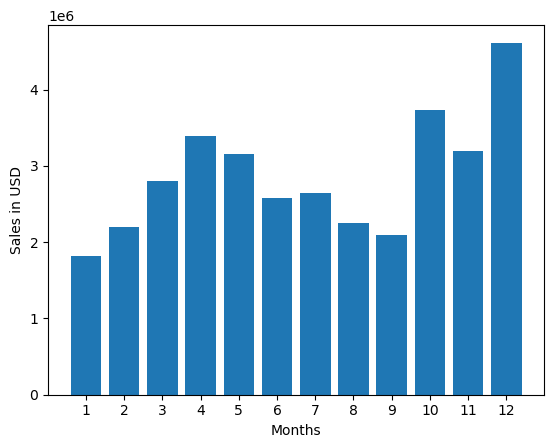

In [23]:
#sử dụng matplotlib để vẽ biểu đồ
months = range(1, 13)
plt.bar(x=months, height=sale_value[:-1])  # Loại bỏ phần tử cuối cùng của sale_value
plt.xticks(months) #truyền thông số vào trục x
plt.xlabel('Months')
plt.ylabel('Sales in USD')
plt.show()

##### What city has the best sales?

In [24]:
df['City'] = ''
df.head()

C:\Users\D4 COMPUTER\AppData\Local\Temp\ipykernel_14352\1730363590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City'] = ''


,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,Month,City
0,141234,iPhone,1.0,700.000000,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,
1,141235,Lightning Charging Cable,1.0,14.950000,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,
2,141236,Wired Headphones,2.0,11.990000,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,
3,141237,27in FHD Monitor,1.0,149.990005,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,
4,141238,Wired Headphones,1.0,11.990000,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,


In [25]:
data_address = df['Purchase Address']
df['City'] = data_address.str.split(',').str[1] #Cắt chuỗi lấy phần tử sau dấu ',' thứ 1
df.head()

C:\Users\D4 COMPUTER\AppData\Local\Temp\ipykernel_14352\68101831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City'] = data_address.str.split(',').str[1] #Cắt chuỗi lấy phần tử sau dấu ',' thứ 1


,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,Month,City
0,141234,iPhone,1.0,700.000000,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1.0,14.950000,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2.0,11.990000,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1.0,149.990005,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1.0,11.990000,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin


In [26]:
#lọc dữ liệu doanh thu theo từng thành phố
df.groupby('City').sum()['Sale']

City
 Atlanta          2795498.58
 Austin           1819581.75
 Boston           3661642.01
 Dallas           2767975.40
 Los Angeles      5452570.80
 New York City    4664317.43
 Portland         2320490.61
 San Francisco    8262203.91
 Seattle          2747755.48
Name: Sale, dtype: float64

In [27]:
sale_value_in_city = df.groupby('City').sum()['Sale']
max_sale_in_city = sale_value_in_city.max()
city_with_max_sale = sale_value_in_city.idxmax() # lấy tên thành phố có doanh thu cao nhất
print('Doanh thu cao nhất theo thành phố là ' + str(max_sale_in_city) + ' USD ' + 'của thành phố ' + str(city_with_max_sale))

Doanh thu cao nhất theo thành phố là 8262203.91 USD của thành phố  San Francisco


In [28]:
#cách khác 
#address_to_city = lambda address:address.split(',')[1]
#df['City'] = df['Purchase Address'].apply(address_to_city)
#df.head()

In [29]:
cities_name = [city for city, sales in sale_value_in_city.items()]
cities_name

[' Atlanta',
 ' Austin',
 ' Boston',
 ' Dallas',
 ' Los Angeles',
 ' New York City',
 ' Portland',
 ' San Francisco',
 ' Seattle']

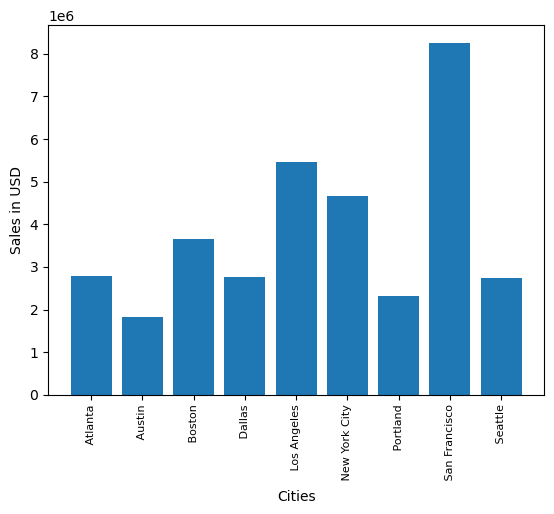

In [30]:
plt.bar(x = cities_name, height = sale_value_in_city)
plt.xticks(cities_name, rotation=90, size=8)
plt.xlabel('Cities')
plt.ylabel('Sales in USD')
plt.show()

##### What time should we display ads to maximize the likelihood of customer's buying product?

In [31]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
print(df['Order Date'].dtypes)

C:\Users\D4 COMPUTER\AppData\Local\Temp\ipykernel_14352\3722560353.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


datetime64[ns]


C:\Users\D4 COMPUTER\AppData\Local\Temp\ipykernel_14352\3722560353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


In [32]:
df['Hours'] = df['Order Date'].dt.hour
df

C:\Users\D4 COMPUTER\AppData\Local\Temp\ipykernel_14352\1480281810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hours'] = df['Order Date'].dt.hour


,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,Month,City,Hours
0,141234,iPhone,1.0,700.000000,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21.0
1,141235,Lightning Charging Cable,1.0,14.950000,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14.0
2,141236,Wired Headphones,2.0,11.990000,23.98,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13.0
3,141237,27in FHD Monitor,1.0,149.990005,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20.0
4,141238,Wired Headphones,1.0,11.990000,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11.0
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3.0,2.990000,8.97,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",09,Los Angeles,20.0
11682,259354,iPhone,1.0,700.000000,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",09,San Francisco,16.0
11683,259355,iPhone,1.0,700.000000,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",09,San Francisco,7.0
11684,259356,34in Ultrawide Monitor,1.0,379.989990,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",09,San Francisco,17.0


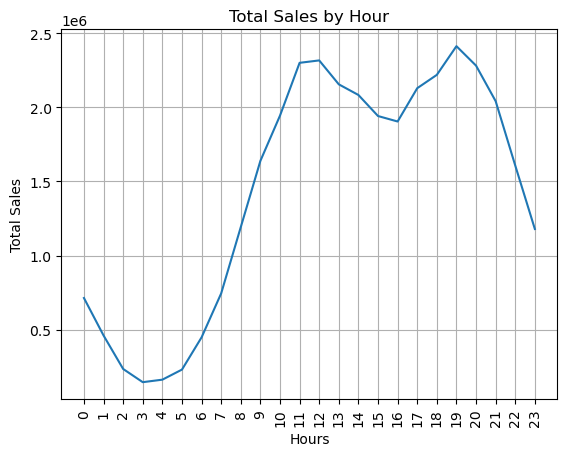

In [33]:
# Sum the 'Sales' column for each unique hour - này là tính tổng doanh thu 
sale_value_hours = df.groupby('Hours')['Sale'].sum()
hours = sale_value_hours.index  # Use the index as the hours

# plot : biểu đồ đường
plt.plot(hours, sale_value_hours)
plt.xticks(hours, rotation=90)
plt.grid() #lưới
plt.xlabel('Hours')
plt.ylabel('Total Sales')
plt.title('Total Sales by Hour')
plt.show()

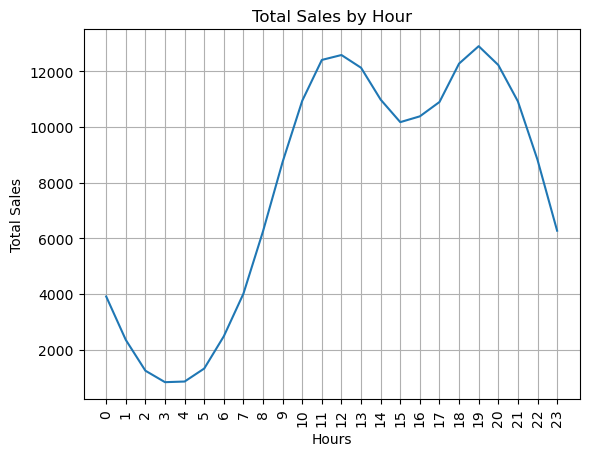

In [34]:
#đây là tính theo số đơn hàng lớn nhất theo khung giờ
sale_value_hours = df.groupby('Hours').count()['Sale']
hours = sale_value_hours.index  # Use the index as the hours

# plot : biểu đồ đường
plt.plot(hours, sale_value_hours)
plt.xticks(hours, rotation=90)
plt.grid() #lưới
plt.xlabel('Hours')
plt.ylabel('Total Sales')
plt.title('Total Sales by Hour')
plt.show()

##### What product are most often sold together ?

In [35]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,Month,City,Hours
0,141234,iPhone,1.0,700.000000,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21.0
1,141235,Lightning Charging Cable,1.0,14.950000,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14.0
2,141236,Wired Headphones,2.0,11.990000,23.98,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13.0
3,141237,27in FHD Monitor,1.0,149.990005,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20.0
4,141238,Wired Headphones,1.0,11.990000,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11.0


In [37]:
df_dup = df[df['Order ID'].duplicated(keep=False)]
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,Month,City,Hours
41,141275,USB-C Charging Cable,1.0,11.95,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16.0
42,141275,Wired Headphones,1.0,11.99,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16.0
57,141290,Apple Airpods Headphones,1.0,150.00,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8.0
58,141290,AA Batteries (4-pack),3.0,3.84,11.52,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8.0
133,141365,Vareebadd Phone,1.0,400.00,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,New York City,11.0


In [41]:
groupProduct = lambda product : ', '.join(product)

In [42]:
# nhóm các đơn hàng có cùng id đơn hàng lại với nhau
df_dup['All Product'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)
df_dup.head()


C:\Users\D4 COMPUTER\AppData\Local\Temp\ipykernel_14352\1467048791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Product'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)


,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,Month,City,Hours,All Product
41,141275,USB-C Charging Cable,1.0,11.95,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16.0,"USB-C Charging Cable, Wired Headphones"
42,141275,Wired Headphones,1.0,11.99,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16.0,"USB-C Charging Cable, Wired Headphones"
57,141290,Apple Airpods Headphones,1.0,150.00,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8.0,"Apple Airpods Headphones, AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3.0,3.84,11.52,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8.0,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1.0,400.00,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,New York City,11.0,"Vareebadd Phone, Wired Headphones"


In [43]:
#bỏ những dòng duplicate đi
df_dup = df_dup[['Order ID', 'All Product']].drop_duplicates()
df_dup

,Order ID,All Product
41,141275,"USB-C Charging Cable, Wired Headphones"
57,141290,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,"Vareebadd Phone, Wired Headphones"
153,141384,"Google Phone, USB-C Charging Cable"
220,141450,"Google Phone, Bose SoundSport Headphones"
...,...,...
11617,259296,"Apple Airpods Headphones, Apple Airpods Headph..."
11619,259297,"iPhone, Lightning Charging Cable, Lightning Ch..."
11627,259303,"34in Ultrawide Monitor, AA Batteries (4-pack)"
11639,259314,"Wired Headphones, AAA Batteries (4-pack)"


In [45]:
#đếm số lần lặp
df_dup['All Product'].value_counts().head(10)

All Product
iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
iPhone, Apple Airpods Headphones                        286
Google Phone, Bose SoundSport Headphones                161
Vareebadd Phone, Wired Headphones                       104
Google Phone, USB-C Charging Cable, Wired Headphones     77
Vareebadd Phone, Bose SoundSport Headphones              60
Name: count, dtype: int64

##### What product sold the most? Why do you think it sold the most?

In [46]:
df

,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,Month,City,Hours
0,141234,iPhone,1.0,700.000000,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21.0
1,141235,Lightning Charging Cable,1.0,14.950000,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14.0
2,141236,Wired Headphones,2.0,11.990000,23.98,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13.0
3,141237,27in FHD Monitor,1.0,149.990005,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20.0
4,141238,Wired Headphones,1.0,11.990000,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11.0
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3.0,2.990000,8.97,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",09,Los Angeles,20.0
11682,259354,iPhone,1.0,700.000000,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",09,San Francisco,16.0
11683,259355,iPhone,1.0,700.000000,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",09,San Francisco,7.0
11684,259356,34in Ultrawide Monitor,1.0,379.989990,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",09,San Francisco,17.0


In [50]:
all_products = df.groupby('Product')['Quantity Ordered'].sum()
all_products

Product
20in Monitor                   4129.0
27in 4K Gaming Monitor         6244.0
27in FHD Monitor               7550.0
34in Ultrawide Monitor         6199.0
AA Batteries (4-pack)         27635.0
AAA Batteries (4-pack)        31017.0
Apple Airpods Headphones      15661.0
Bose SoundSport Headphones    13457.0
Flatscreen TV                  4819.0
Google Phone                   5532.0
LG Dryer                        646.0
LG Washing Machine              666.0
Lightning Charging Cable      23217.0
Macbook Pro Laptop             4728.0
Product                           0.0
ThinkPad Laptop                4130.0
USB-C Charging Cable          23975.0
Vareebadd Phone                2068.0
Wired Headphones              20557.0
iPhone                         6849.0
Name: Quantity Ordered, dtype: float64

In [53]:
#Check the 'Price Each' column for non-numeric values
unique_prices = df['Price Each'].unique()
print(unique_prices)
#Convert the column to a numeric type
df['Price Each'] = pd.to_numeric(df['Price Each'])

prices = df.groupby('Product')['Price Each'].mean()
prices

[ 700.     14.95   11.99  149.99    2.99  389.99   11.95   99.99  150.
 1700.    300.    400.      3.84  600.    109.99  379.99  999.99     nan]


C:\Users\D4 COMPUTER\AppData\Local\Temp\ipykernel_14352\4189872903.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Each'] = pd.to_numeric(df['Price Each'])


Product
20in Monitor                   109.989998
27in 4K Gaming Monitor         389.990021
27in FHD Monitor               149.990005
34in Ultrawide Monitor         379.990021
AA Batteries (4-pack)            3.840000
AAA Batteries (4-pack)           2.990000
Apple Airpods Headphones       150.000000
Bose SoundSport Headphones      99.989998
Flatscreen TV                  300.000000
Google Phone                   600.000000
LG Dryer                       600.000000
LG Washing Machine             600.000000
Lightning Charging Cable        14.950000
Macbook Pro Laptop            1700.000000
Product                               NaN
ThinkPad Laptop                999.989990
USB-C Charging Cable            11.950000
Vareebadd Phone                400.000000
Wired Headphones                11.990000
iPhone                         700.000000
Name: Price Each, dtype: float32

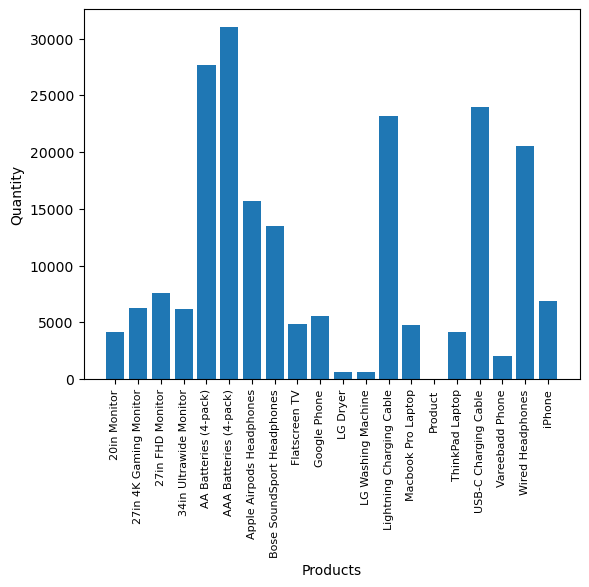

In [51]:
product_ls = [product for product, quant in all_products.items()]
plt.bar(product_ls, all_products)
plt.xticks(product_ls, rotation=90, size=8)
plt.xlabel('Products')
plt.ylabel('Quantity')
plt.show()

C:\Users\D4 COMPUTER\AppData\Local\Temp\ipykernel_14352\513889015.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product_ls, rotation=90, size=8)


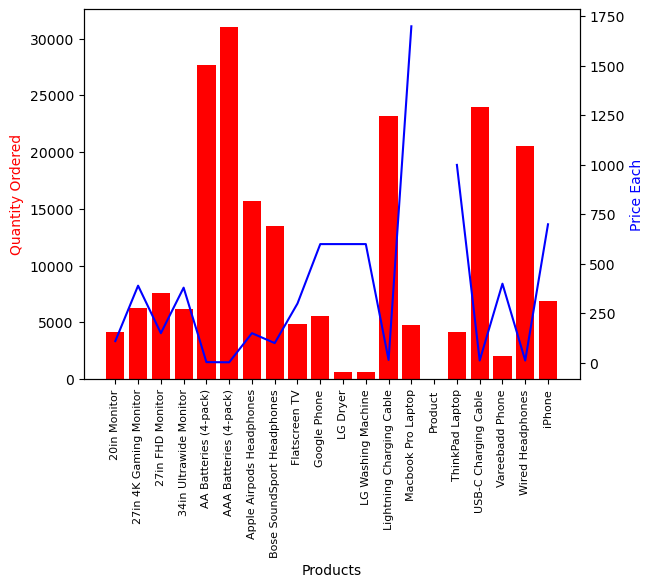

In [56]:
#Biểu đồ thể hiện mối liên hệ giữa sản phẩm và giá cả
x = product_ls #tên tất cả sản phẩm
y1 = all_products #danh sách tổng số lượng bán ra của sản phẩm
y2 = prices # danh sách giá của từng sản phẩm
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(x, y1, color='r')
ax2.plot(x, y2, 'b-')

ax1.set_xticklabels(product_ls, rotation=90, size=8)
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='r')
ax2.set_ylabel('Price Each', color='b')
plt.show()